# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 

## Homework 5: Autoencoders 

**Harvard University**<br/>
**Spring 2020**<br/>
**Instructors:** Pavlos Protopapas, Mark Glickman, Chris Tanner<br/>

<hr style="height:2pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

<hr style="height:2pt">

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs.

- Please restart the kernel and run the entire notebook again before you submit.

<hr style="height:2pt">

In [3]:
import numpy as np
import seaborn as sns

from matplotlib import pyplot
import matplotlib.pylab as plt 
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam, SGD


In [4]:
from tensorflow.keras.models import load_model

<div class="theme"> Overview </div> 


In this homework, we will investigate autoencoders, how they are related to PCA (and in doing so, show that they can be a more powerful extension of this technique), and one possible application of autoencoders for outlier detection.

<div class='exercise'><b> Question 1: Autoencoders and MNIST [50pts total] </b></div>

For this question, we will be using the [MNIST Dataset](https://en.wikipedia.org/wiki/MNIST_database) of handwritten digits, a simple standardized image dataset. The dataset consists of single-channel (black and white) 28x28 images, containing one digit each. We will see if it is feasible to encode (compress, in this case) the images into just 2 dimensions, a substantial compression ratio considering that the original vector has dimension 28x28=784.

**1.1** [1pts] Load MNIST using `tf.keras.datasets.mnist.load_data()`, saving the training data as `x_train` and `y_train`, and the test data as `x_test`, `y_test`. Normalize the images to the range [0.,1.] by dividing by 255.

**1.2** [1pts] Use `imshow` to show one image of your choice from the train set, specifying `cmap='gray'` to show the image in black and white.

**1.3** [2pts] Construct and instance of `sklearn`'s `PCA` class, specifying that it only use the first 2 PCA components. Fit to `x_train` (Hint: you will need to use `reshape`), and project `x_train` down to its first 2 PCA components, saving the new array of shape (N,2) to `pca_latent_train`. This is the representation of all the images in `x_train` in a 2D latent space.

**1.4** [2pts] Make a scatterplot of `pca_latent_train` with the point color designated by the corresponding class labels. Pick a reasonable color palette with enough of a contrast to clearly distinguish classes. 

**1.5** [8pts] Linear Autoencoder. Construct an encoder-decoder network with **linear activations** only, and **no biases**. The encoder and decoder should consist of one dense layer each, and the bottleneck dimension should be 2. The encoder and decoder should be their own separate models called `linear_encoder` and `linear_decoder`. Create the full linear autoencoder, call it `lae`, out of the encoder and decoder. Use a mean-squared-error reconstruction loss. Print the `summary()` for both the encoder and decoder networks, as well as the summary for the full linear autoencoder.

**1.6** [4pts] Train your linear autoencoder `lae` on the train data, using `x_test` as validation data. Use enough epochs such that the training loss plateaus. Plot the train loss and validation (equivalent to test, in this case) loss as a function of epoch, in the same figure.

**1.7** [3pts] Compute the `linear_encoder`'s latent space representation of `x_train`, calling the resulting array `lae_latent_train`. Create two scatterplots, side by side, using `subplots`, showing `pca_latent_train` (from **1.4**) and `lae_latent_train`, with points colored according to class label. Don't forget to title the two figures.

**1.8** [3pts] What do you notice about the latent space representations in PCA and the LAE (linear autoencoder)? Does either one do a substantially better job at separating the 10 classes in the 2D latent space? --- *Bonus, but for no additional points: prove a relationship between the latent space representation in PCA and LAE for the same bottleneck dimension.*

**1.9** [3pts] What do you expect to happen if you added more dense layers (no biases) with only linear activations to your `linear_encoder` and `linear_decoder`? Would you expect a better reconstruction error?

**1.10** [8pts] Construct a nonlinear (regular) autoencoder with at least 2 dense layers, with biases, in both the encoder and decoder parts. Call the encoder network `encoder` and the decoder network `decoder`, and the full autoencoder `ae`. Print the summaries for `encoder`, `decoder`, and `ae`.

**1.11** [4pts] Train your autoencoder on `x_train`, using `x_test` as validation data. Train it for a reasonable number of epochs, using your best judgement on what that entails. As usual, plot the train loss and validation loss as a function of epoch.

**1.12** [3pts] Compute the `encoder`'s latent space representation of `x_train`, calling the resulting array `ae_latent_train`. Plot the scatterplots of `pca_latent_train`, `lae_latent_train`, and `ae_latent_train` in a row using `subplots` so we can see them all simultaneously. What do you notice?

**1.13** [6pts] Comparing reconstructed images. You will create arrays containing the reconstructed `x_test` using PCA, the linear autoencoder, and the regular autoencoder. For PCA, be sure to use the `pca` object you created and fit in **1.3** on the *train* data. You will project `x_test` onto its 2D latent space representation, and then convert it back, saving the result as `pca_recons_x_test`. For the linear autoencoder and the regular autoencoder, save the reconstructed `x_test` as `lae_recons_x_test` and `ae_recons_x_test` respectively. Now, you will create a 6 row by 4 column collection of subplots. Each row will correspond to an element of the test set (of your choice), with the columns being the PCA reconstruction, the LAE reconstruction, the AE reconstruction, and the original image. Be sure to title the subplots with 'PCA', 'LAE', 'AE', 'Original'. 

**1.14** [2pts] Finally, using `sklearn.metrics`'s `mean_squared_error`, report the average reconstruction error across the entire test set for PCA, LAE, and AE. Does the ordering agree with what you've seen in the previous questions? Does it support your conclusion in **1.8**?



## Answers

**1.1** [1pts] Load MNIST using `tf.keras.datasets.mnist.load_data()`, saving the training data as `x_train` and `y_train`, and the test data as `x_test`, `y_test`. Normalize the images to the range [0.,1.] by dividing by 255.


In [5]:
print(tf.config.experimental.list_physical_devices("GPU"))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
import tensorflow as tf
from tf_keras_vis.utils import print_gpus
print_gpus()

1 Physical GPUs, 1 Logical GPU


In [7]:
# load data
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

# normalize the data by dividing with pixel intensity
x_train, x_test = x_train / 255.0, x_test / 255.0


In [8]:
print(f'x_train shape: {x_train.shape}, x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}, and y_test shape: {y_test.shape}')


x_train shape: (60000, 28, 28), x_test shape: (10000, 28, 28)
y_train shape: (60000,), and y_test shape: (10000,)


**1.2** [1pts] Use `imshow` to show one image of your choice from the train set, specifying `cmap='gray'` to show the image in black and white.


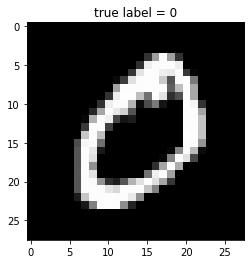

In [9]:
# classes are named 0-9 so define names for plotting clarity
##pick a random image to show
image_id =1 
plt.imshow(x_train[image_id], cmap='gray')
label = y_train[image_id]

pyplot.title(f'true label = {label}')
plt.show()

**1.3** [2pts] Construct and instance of `sklearn`'s `PCA` class, specifying that it only use the first 2 PCA components. Fit to `x_train` (Hint: you will need to use `reshape`), and project `x_train` down to its first 2 PCA components, saving the new array of shape (N,2) to `pca_latent_train`. This is the representation of all the images in `x_train` in a 2D latent space.


In [10]:
#first understand the picture shape
n_samples, h, w = x_train.shape
print(f'We have {n_samples} data sample images, each with height: {h} and width: {w}')
print(f'Data dimensionality: {h*w}')

We have 60000 data sample images, each with height: 28 and width: 28
Data dimensionality: 784


In [11]:
# Flatten images for PCA
X_train_flat = x_train.reshape(x_train.shape[0], -1)
X_test_flat = x_test.reshape(x_test.shape[0], -1)
print(f'X_train flattened shape: {X_train_flat.shape}, X_test flattened shape: {X_test_flat.shape}')


X_train flattened shape: (60000, 784), X_test flattened shape: (10000, 784)


In [12]:
from sklearn.decomposition import PCA

In [13]:

# Let's find the first 2 PCA components
num_components = 2
pca = PCA(n_components=num_components).fit(X_train_flat)

# take a look at them
print(f'Shape of the 2 component vector (First and Second): {pca.components_.shape}')
print(f'Shape of first PC: {pca.components_[0].shape}')
print(f'Shape of second PC: {pca.components_[1].shape}')


Shape of the 2 component vector (First and Second): (2, 784)
Shape of first PC: (784,)
Shape of second PC: (784,)


In [14]:
# print the variance explained by those components
pct = pca.explained_variance_
pctall=pct[0]+pct[1]
print(f'The first two component vector explain about {pctall:.2f} % variance of the variance' )

The first two component vector explain about 8.86 % variance of the variance


In [15]:
# reshape so they resemble images and we can print them
pca_latent_train = pca.components_.reshape((num_components, h, w))
print(f"Shape of reshaped pca_latent_train: {pca_latent_train.shape},\n"
      f"shape of the first latern shape of pca_latent_train: {pca_latent_train[0].shape},\n"
      f"shape of the secodn latern shape of pca_latent_train: {pca_latent_train[1].shape}")


Shape of reshaped pca_latent_train: (2, 28, 28),
shape of the first latern shape of pca_latent_train: (28, 28),
shape of the secodn latern shape of pca_latent_train: (28, 28)


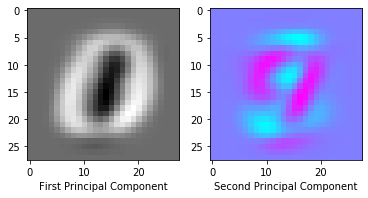

In [16]:
# show the reshaped principal components (eigenclothes)
f, ax = plt.subplots(1,2)
ax[0].imshow(pca_latent_train[0], cmap='gray');
ax[0].set_xlabel('First Principal Component');
ax[1].imshow(pca_latent_train[1], cmap='cool');
ax[1].set_xlabel('Second Principal Component');


**1.4** [2pts] Make a scatterplot of `pca_latent_train` with the point color designated by the corresponding class labels. Pick a reasonable color palette with enough of a contrast to clearly distinguish classes.


In [17]:
# transform the train data set
pca_latent_train = pca.transform(X_train_flat)
print(pca_latent_train.shape)

(60000, 2)


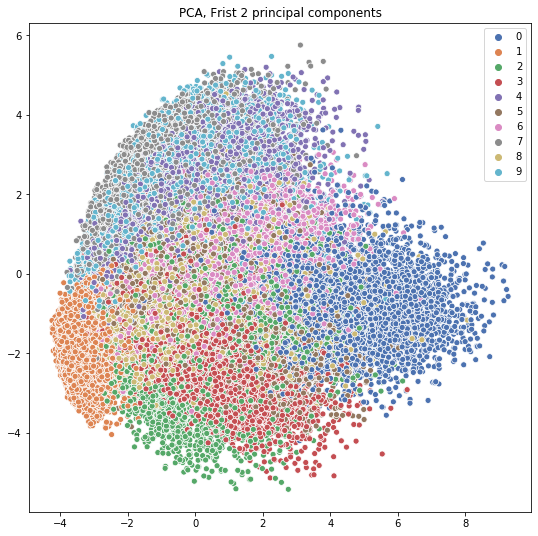

In [18]:
#plot the PCA 2 components
fig, ax1 = plt.subplots(1,1, figsize=(9,9))
sns.scatterplot(x=pca_latent_train[:,0], y=pca_latent_train[:,1], hue=y_train,
                palette=sns.color_palette("deep", 10),  ax=ax1)
ax1.set_title("PCA, Frist 2 principal components");


**1.5** [8pts] Linear Autoencoder. Construct an encoder-decoder network with **linear activations** only, and **no biases**. The encoder and decoder should consist of one dense layer each, and the bottleneck dimension should be 2. The encoder and decoder should be their own separate models called `linear_encoder` and `linear_decoder`. Create the full linear autoencoder, call it `lae`, out of the encoder and decoder. Use a mean-squared-error reconstruction loss. Print the `summary()` for both the encoder and decoder networks, as well as the summary for the full linear autoencoder.


In [19]:
input_dim = X_train_flat.shape[1]  
input_dim


784

In [20]:
x_train.reshape(-1,input_dim).shape  ##this input need to be reshape

(60000, 784)

In [21]:
#encoder
input_dim = X_train_flat.shape[1]  
encoding_dim = 2  
 # 784

input_layer = Input(shape=(input_dim ,))
encoded = Dense(encoding_dim, activation='linear', use_bias=False)(input_layer)
linear_encoder = Model(input_layer, encoded, name='linear_encoder' )

linear_encoder.summary()

Model: "linear_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1568      
Total params: 1,568
Trainable params: 1,568
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Decoder

latent_input = Input(shape=(encoding_dim,))
decoded = Dense(input_dim, activation='linear', use_bias=False)(latent_input)
linear_decoder = Model(latent_input, decoded, name='linear_decoder')
linear_decoder.summary()

Model: "linear_decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               1568      
Total params: 1,568
Trainable params: 1,568
Non-trainable params: 0
_________________________________________________________________


In [23]:
#create autoencoder model which has input as input_features and outputs decoded
lae = Sequential(name='lae')
lae.add(linear_encoder)
lae.add(linear_decoder)

lae.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='sgd')
print(lae.summary())

Model: "lae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
linear_encoder (Model)       (None, 2)                 1568      
_________________________________________________________________
linear_decoder (Model)       (None, 784)               1568      
Total params: 3,136
Trainable params: 3,136
Non-trainable params: 0
_________________________________________________________________
None


**1.6** [4pts] Train your linear autoencoder `lae` on the train data, using `x_test` as validation data. Use enough epochs such that the training loss plateaus. Plot the train loss and validation (equivalent to test, in this case) loss as a function of epoch, in the same figure.


In [24]:
# 
%time

nb_epoch = 10
batch_size = 16
history = lae.fit(x_train.reshape(-1,input_dim), x_train.reshape(-1,input_dim),
                epochs=nb_epoch,
                batch_size=batch_size,
                shuffle=True,
                validation_data= (x_test.reshape(-1,input_dim),x_test.reshape(-1,input_dim)),
                verbose=0)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.82 µs


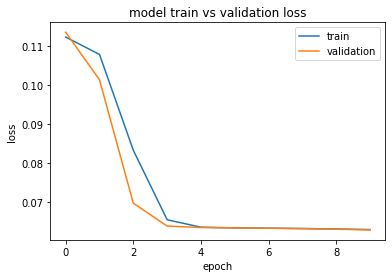

In [25]:
#plot our loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


After 3 epochs, the autoencoder seems to reach a stable train/validation loss value of about 0.06 

In [26]:
#save model
lae.save('linearmodel.h5')

lae.save_weights('linearmodel_weights.h5')

In [27]:
lae = load_model('linearmodel.h5')
#lae.load_weights('linearmodel_weights.h5')

**1.7** [3pts] Compute the `linear_encoder`'s latent space representation of `x_train`, calling the resulting array `lae_latent_train`. Create two scatterplots, side by side, using `subplots`, showing `pca_latent_train` (from **1.4**) and `lae_latent_train`, with points colored according to class label. Don't forget to title the two figures.


In [28]:
#reshape 
lae_latent_train = linear_encoder.predict(x_train.reshape(-1,input_dim))

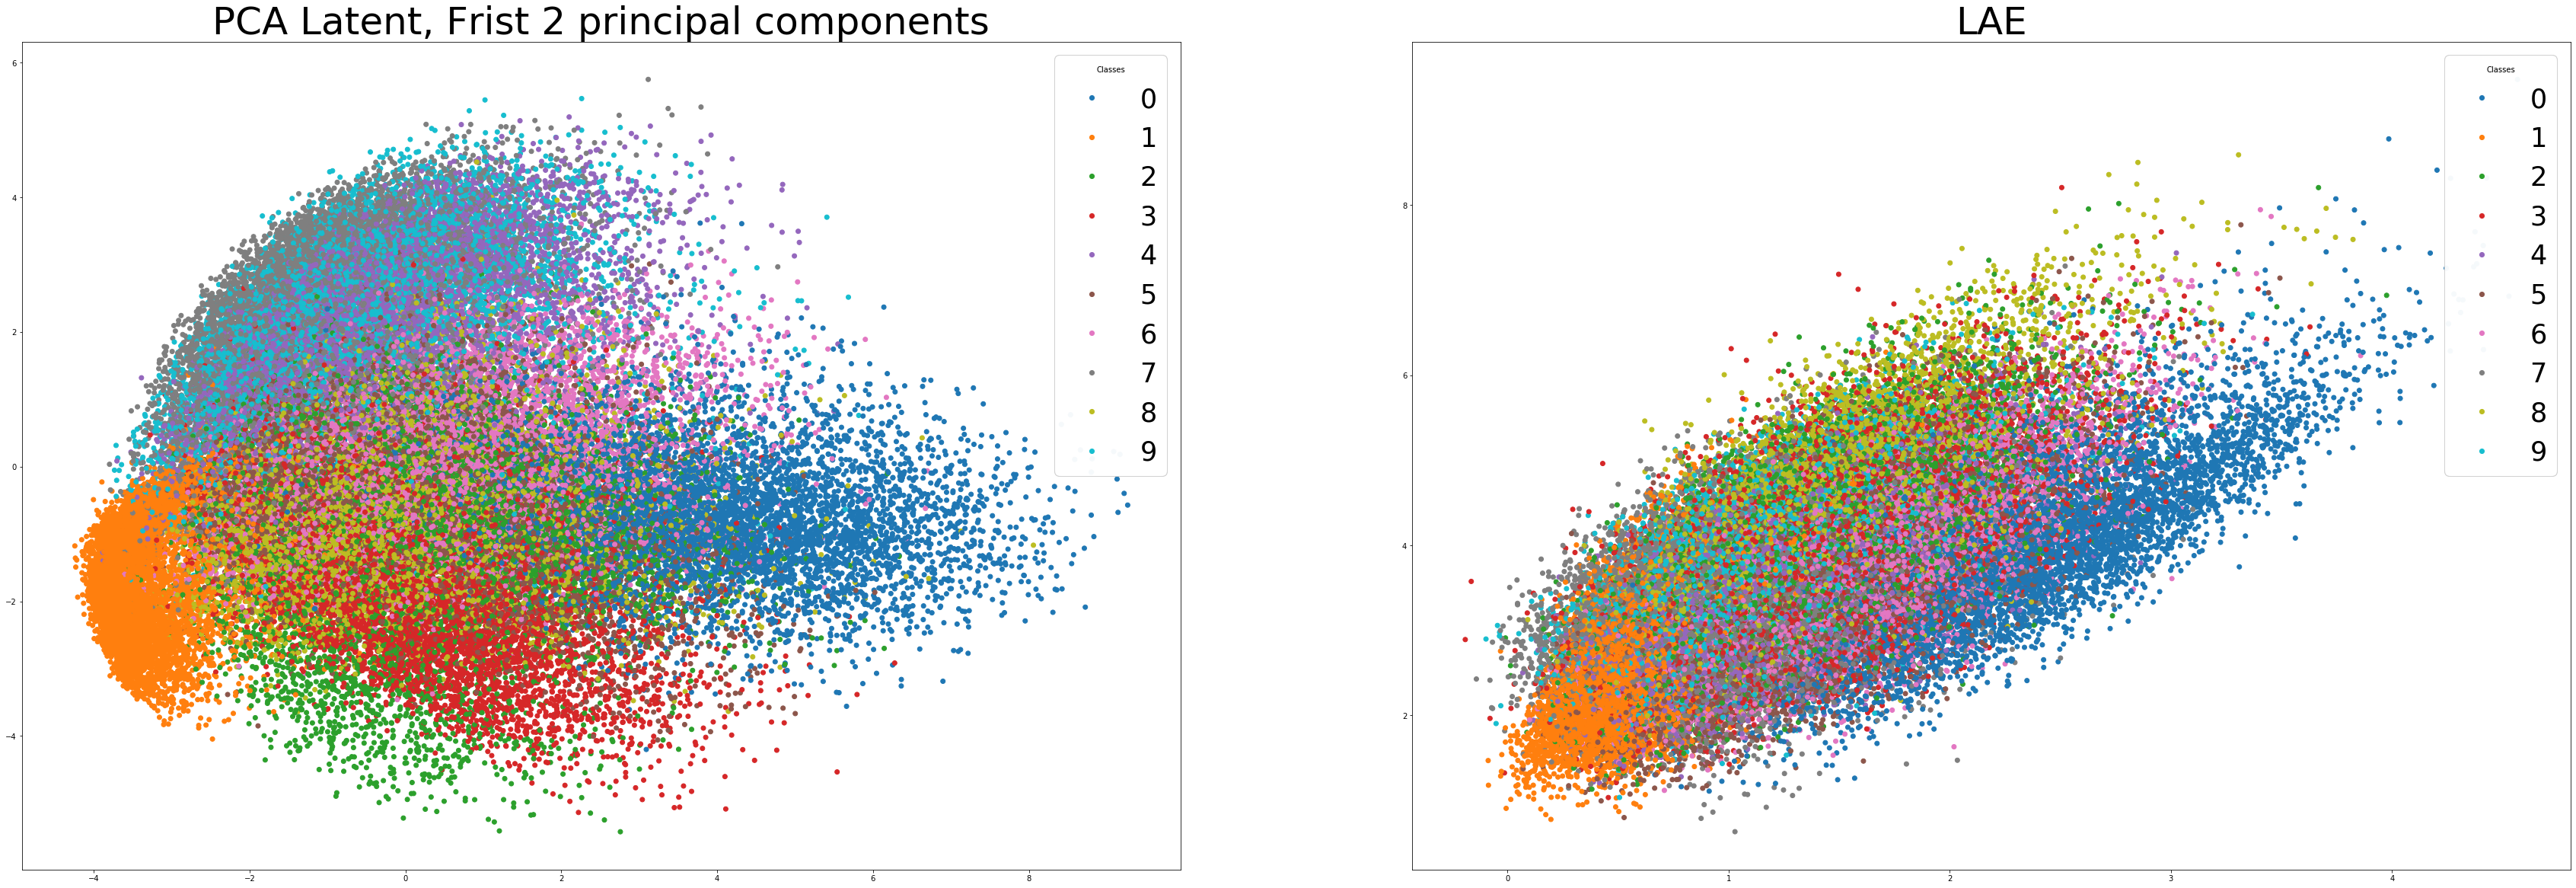

In [29]:
f, ax = plt.subplots(1,2, figsize=(60,20))

scatter=ax[0].scatter(x=pca_latent_train[:,0], y=pca_latent_train[:,1],cmap='tab10', c=y_train)
ax[0].set_title("PCA Latent, Frist 2 principal components", size = 50);

# produce a legend with the unique colors from the scatter
legend1 = ax[0].legend(*scatter.legend_elements(),
                    loc="upper right", prop={'size': 35},title="Classes")
ax[0].add_artist(legend1)

scatter2=ax[1].scatter(lae_latent_train[:, 0], lae_latent_train[:, 1],cmap='tab10', c= y_train)
ax[1].set_title('LAE', size = 50)

# produce a legend with the unique colors from the scatter
legend2 = ax[1].legend(*scatter2.legend_elements(),
                    loc="upper right", prop={'size': 35},title="Classes")
ax[1].add_artist(legend2)


plt.show()

**1.8** [3pts] What do you notice about the latent space representations in PCA and the LAE (linear autoencoder)? Does either one do a substantially better job at separating the 10 classes in the 2D latent space? --- *Bonus, but for no additional points: prove a relationship between the latent space representation in PCA and LAE for the same bottleneck dimension.*


*Your answer here*

From the charts above, PCA does a better job separating these 10 classes in the 2D latene space.
The PCA chart basically plots the 2 principal components and colors the values based on target (10 digits). 
It beautifully explains some similarities in the data. For example, 0 or 2 are pretty much by itself while 1 is pretty close to 7. 
However, LAE seems to form a more narrow diagonal line across the chart and most classes are clustered closely along the line. the chart explains some similarities in the numbers (10 classes) but not as well as PCA does. 


**1.9** [3pts] What do you expect to happen if you added more dense layers (no biases) with only linear activations to your `linear_encoder` and `linear_decoder`? Would you expect a better reconstruction error?


*Your answer here*


    More dense layers with linear activation and no bias, will not be able to improve the performance of the linear encoder significantly. As more layer of linear encoder and decoder can only change the scale of the 'distance' of each class, but won't change the direction of these dots drastically to form a more obvious gap.

**1.10** [8pts] Construct a nonlinear (regular) autoencoder with at least 2 dense layers, with biases, in both the encoder and decoder parts. Call the encoder network `encoder` and the decoder network `decoder`, and the full autoencoder `ae`. Print the summaries for `encoder`, `decoder`, and `ae`.


In [30]:
#encoder

input_layer = Input(shape=(784 ,))
encoded = Dense(512, activation='elu', use_bias=True)(input_layer)
encoded = Dense(128, activation='elu')(encoded)
encoded = Dense(2, activation='linear')(encoded)

encoder = Model(input_layer, encoded, name='encoder' )

encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
Total params: 467,842
Trainable params: 467,842
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Decoder

latent_input = Input(shape=(2,))
decoded = Dense(128, activation='elu', use_bias=True)(latent_input)
decoded = Dense(512, activation='elu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

decoder = Model(latent_input, decoded, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_6 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_7 (Dense)              (None, 784)               402192    
Total params: 468,624
Trainable params: 468,624
Non-trainable params: 0
_________________________________________________________________


In [32]:
#create deep autoencoder model
ae = Sequential(name='ae')
ae.add(encoder)
ae.add(decoder)

ae.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer= Adam())
print(ae.summary())

Model: "ae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Model)              (None, 2)                 467842    
_________________________________________________________________
decoder (Model)              (None, 784)               468624    
Total params: 936,466
Trainable params: 936,466
Non-trainable params: 0
_________________________________________________________________
None


**1.11** [4pts] Train your autoencoder on `x_train`, using `x_test` as validation data. Train it for a reasonable number of epochs, using your best judgement on what that entails. As usual, plot the train loss and validation loss as a function of epoch.


In [33]:
# your code here
%time

nb_epoch = 5
batch_size = 128
history = ae.fit(x_train.reshape(-1,input_dim), x_train.reshape(-1,input_dim),
                epochs=nb_epoch,
                batch_size=batch_size,
                shuffle=True,
                validation_data= (x_test.reshape(-1,input_dim),x_test.reshape(-1,input_dim)),
                verbose=1)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10.3 µs
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0566 - accuracy: 0.0075 - val_loss: 0.0485 - val_accuracy: 0.0073
Epoch 2/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0465 - accuracy: 0.0095 - val_loss: 0.0449 - val_accuracy: 0.0105
Epoch 3/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0438 - accuracy: 0.0104 - val_loss: 0.0430 - val_accuracy: 0.0112
Epoch 4/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0422 - accuracy: 0.0118 - val_loss: 0.0418 - val_accuracy: 0.0128
Epoch 5/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0410 - accuracy: 0.0132 - val_loss: 0.0407 - val_accuracy: 0.0120


In [38]:
#save model
ae.save('Deeplinearmodel.h5')

ae.save_weights('Deeplinearmodel_weights.h5')


In [39]:
ae = load_model('Deeplinearmodel.h5')

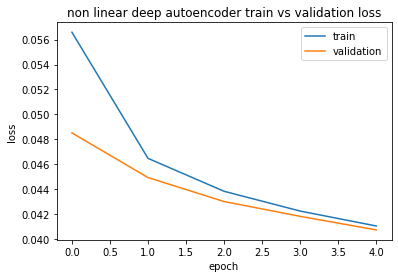

In [34]:
#plot our loss of ae
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('non linear deep autoencoder train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


**1.12** [3pts] Compute the `encoder`'s latent space representation of `x_train`, calling the resulting array `ae_latent_train`. Plot the scatterplots of `pca_latent_train`, `lae_latent_train`, and `ae_latent_train` in a row using `subplots` so we can see them all simultaneously. What do you notice?


In [35]:
# your code here
#create latent layer
ae_latent_train = encoder.predict(x_train.reshape(-1,784))

In [36]:
ae_latent_train.shape

(60000, 2)

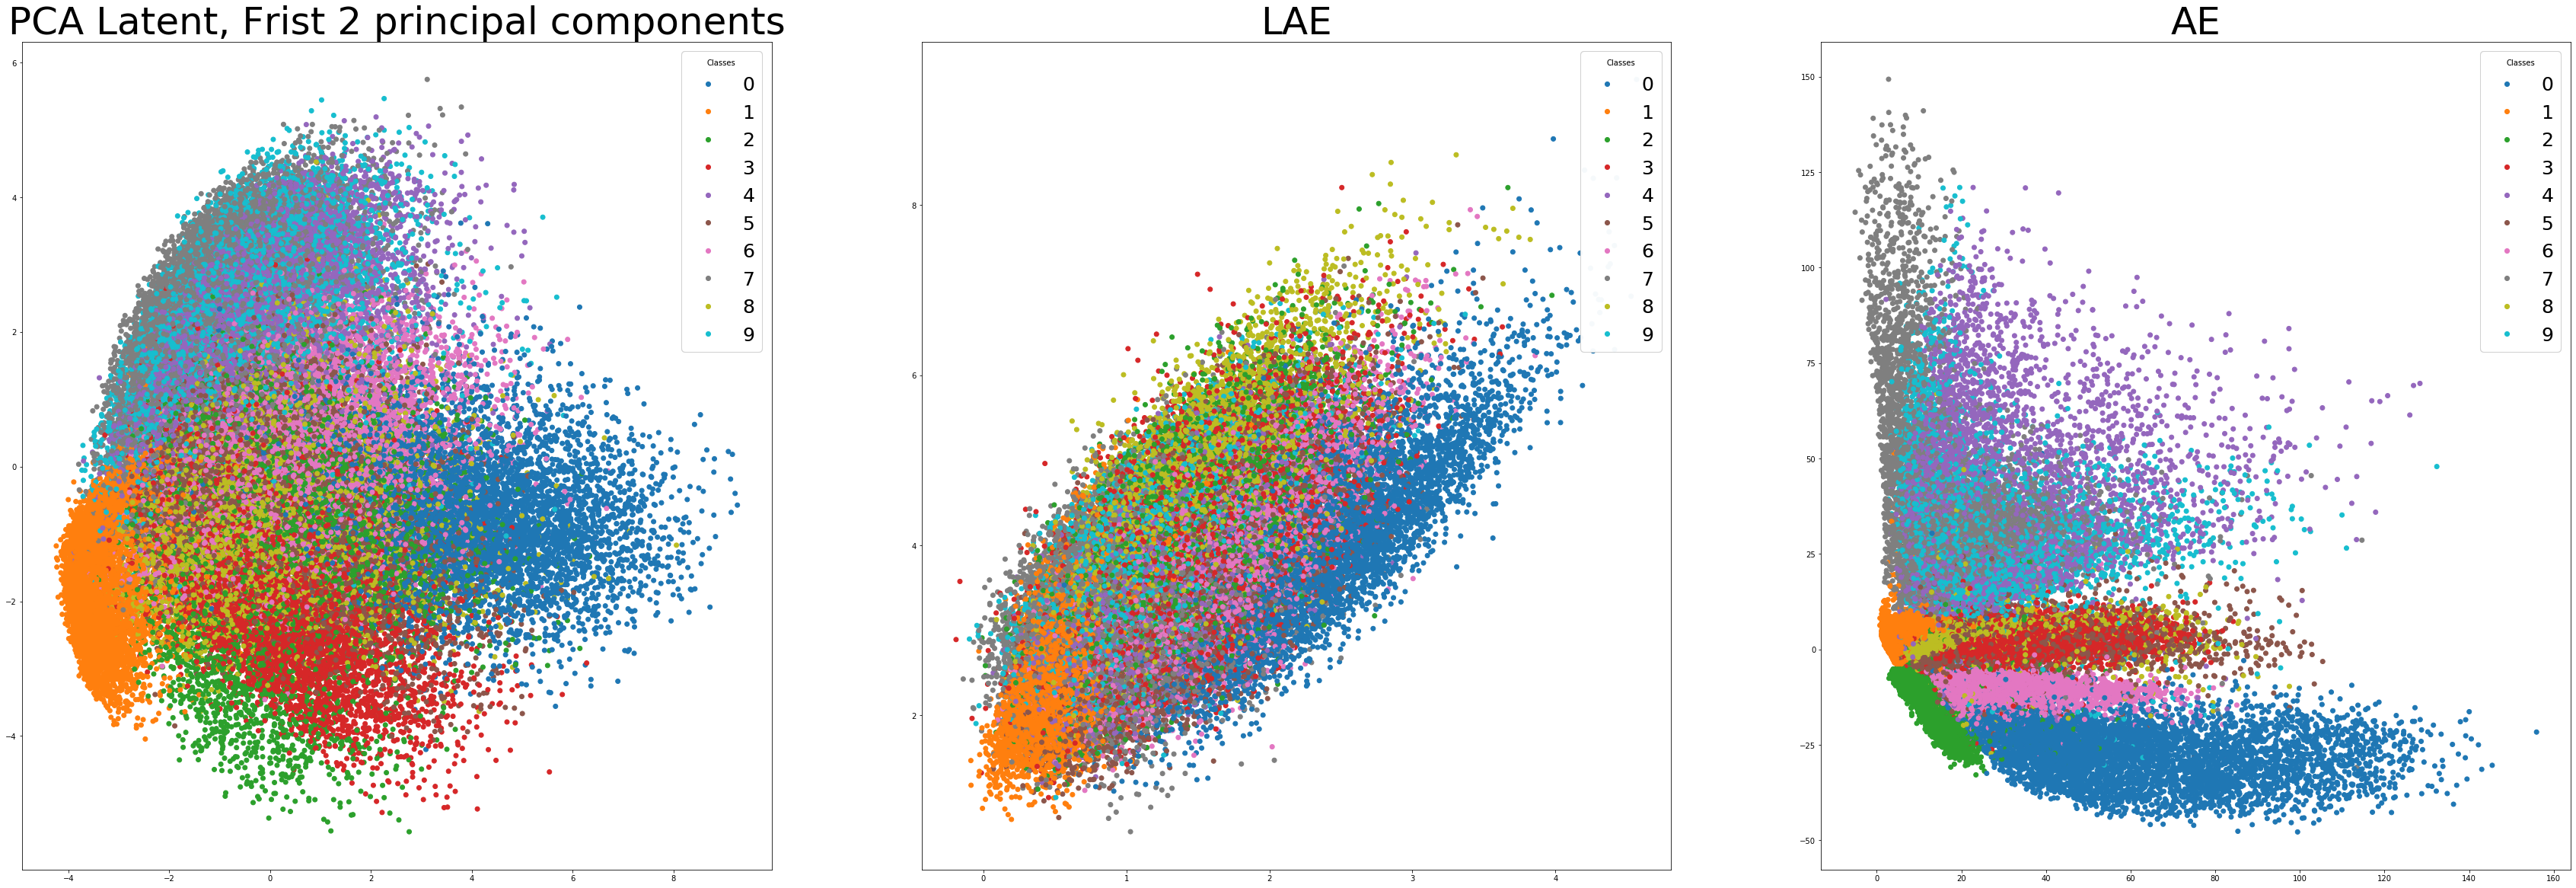

In [37]:
f, ax = plt.subplots(1,3, figsize=(60,20))

scatter=ax[0].scatter(x=pca_latent_train[:,0], y=pca_latent_train[:,1],cmap='tab10', c=y_train)
ax[0].set_title("PCA Latent, Frist 2 principal components", size = 50);

# produce a legend with the unique colors from the scatter
legend1 = ax[0].legend(*scatter.legend_elements(),
                    loc="upper right", prop={'size': 25},title="Classes")
ax[0].add_artist(legend1)

scatter2=ax[1].scatter(lae_latent_train[:, 0], lae_latent_train[:, 1],cmap='tab10', c= y_train)
ax[1].set_title('LAE', size = 50)

# produce a legend with the unique colors from the scatter
legend2 = ax[1].legend(*scatter2.legend_elements(),
                    loc="upper right", prop={'size': 25},title="Classes")
ax[1].add_artist(legend2)


scatter3= ax[2].scatter(ae_latent_train[:, 0], ae_latent_train[:, 1],  cmap='tab10',c= y_train)
ax[2].set_title('AE', size=50)


# produce a legend with the unique colors from the scatter
legend3 = ax[2].legend(*scatter3.legend_elements(),
                    loc="upper right",prop={'size': 25}, title="Classes")
ax[2].add_artist(legend3)
plt.show()

*Your answer here*

From the chart, AE does the best job to separate all 10 classes: most of the classes are well separated with big gaps.
PCA performance is good too, with some numbers overlap so hard to separates. 
LAE's performance is the worst in the three. I can see number 0 is well separated (blue) so does 3 (orange), but other numbes are ovelapped in this plot.


**1.13** [6pts] Comparing reconstructed images. You will create arrays containing the reconstructed `x_test` using PCA, the linear autoencoder, and the regular autoencoder. For PCA, be sure to use the `pca` object you created and fit in **1.3** on the *train* data. You will project `x_test` onto its 2D latent space representation, and then convert it back, saving the result as `pca_recons_x_test`. For the linear autoencoder and the regular autoencoder, save the reconstructed `x_test` as `lae_recons_x_test` and `ae_recons_x_test` respectively. Now, you will create a 6 row by 4 column collection of subplots. Each row will correspond to an element of the test set (of your choice), with the columns being the PCA reconstruction, the LAE reconstruction, the AE reconstruction, and the original image. Be sure to title the subplots with 'PCA', 'LAE', 'AE', 'Original'.


In [40]:
# pca transform the test set
pca_latent_test = pca.transform(X_test_flat)
print("pca test latent space shape is",pca_latent_test.shape)

#pca reconstruct test image
pca_recons_x_test = pca.inverse_transform(pca_latent_test) 
print("pca reconstructed image shape is", pca_recons_x_test.shape)
print("Original test image shape is", X_test_flat.shape)

pca test latent space shape is (10000, 2)
pca reconstructed image shape is (10000, 784)
Original test image shape is (10000, 784)


In [41]:

encoded_imgs = linear_encoder.predict(x_test.reshape(-1,784))
lae_recons_x_test= linear_decoder.predict(encoded_imgs )

encoded_imgs2 =encoder.predict(x_test.reshape(-1,784))
ae_recons_x_test =decoder.predict(encoded_imgs2)
print("Linear autoencoder reconstrued image shape is", lae_recons_x_test.shape)
print("Non-linear autoencoder reconstrued image shape is", ae_recons_x_test.shape)

Linear autoencoder reconstrued image shape is (10000, 784)
Non-linear autoencoder reconstrued image shape is (10000, 784)


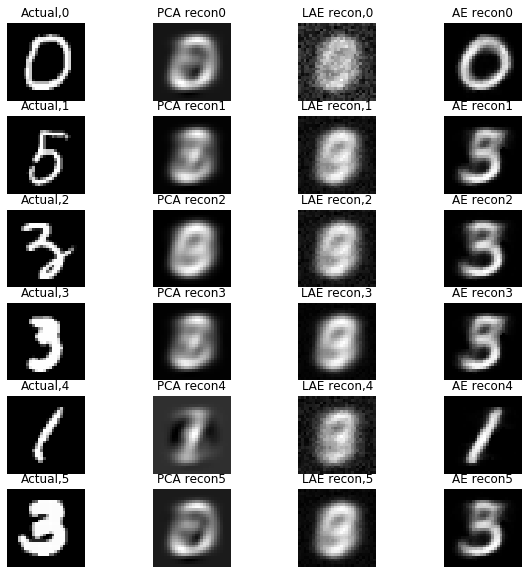

In [42]:
fig, ax = plt.subplots(6,4,figsize=(10,10))

for i, index in enumerate([ 10, 45, 87, 93,107,200]):
    ax[i,0].imshow(X_test_flat[index].reshape(28,28), cmap='gray')
    ax[i,0].set_title(f'Actual,{i}') 
    ax[i,0].axis('off')
    
    ax[i,1].imshow(pca_recons_x_test[index].reshape(28,28), cmap='gray')
    ax[i,1].set_title(f'PCA recon{i}') 
    ax[i,1].axis('off')

    ax[i,2].imshow(lae_recons_x_test[index].reshape(28,28), cmap='gray')
    ax[i,2].set_title(f'LAE recon,{i}') 
    ax[i,2].axis('off')
    
    ax[i,3].imshow(ae_recons_x_test[index].reshape(28,28), cmap='gray')
    ax[i,3].set_title(f'AE recon{i}') 
    ax[i,3].axis('off')


### Advice needed for the chart below (not HW related)
I know the question does not ask for producing this chart below, but i did it any way. This should be the same chart as above but line up 6 reconstructed graphs from 4 different models horizontally. However I have a question in regards to row #3: Why the numbers in row # 3 seems to be completely different numbers compared to other rows? Please advice, if you can. Thank you! :)


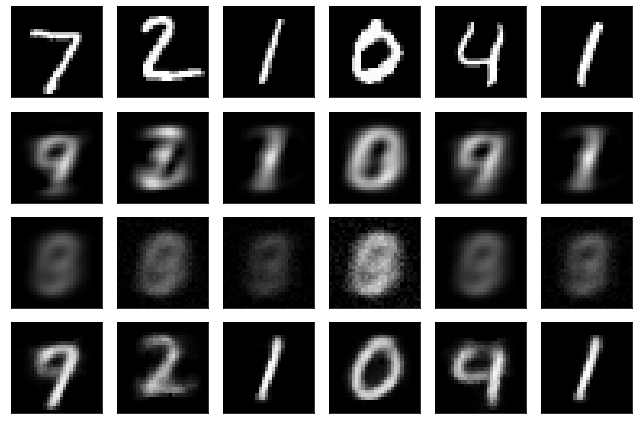

In [43]:
##this is to plot horizontally
plt.figure(figsize=(9,6))
toPlot = (X_test_flat, pca_recons_x_test, lae_recons_x_test, ae_recons_x_test)
for i in range(6):
    for j in range(4):
        ax = plt.subplot(4, 6, 6*j+i+1)
        plt.imshow(toPlot[j][i,:].reshape(28,28), interpolation="nearest", 
                   vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.tight_layout()

##x_train, pca_latent_train, lae_latent_train, ae_latent_train

**1.14** [2pts] Finally, using `sklearn.metrics`'s `mean_squared_error`, report the average reconstruction error across the entire test set for PCA, LAE, and AE. Does the ordering agree with what you've seen in the previous questions? Does it support your conclusion in **1.8**?


In [44]:
# your code here
pca_mse= mean_squared_error(pca_recons_x_test, X_test_flat)
lase_mse =mean_squared_error(lae_recons_x_test, X_test_flat)
ae_mse= mean_squared_error(ae_recons_x_test, X_test_flat)

print(f"PCA mean squared error is {pca_mse:.4f},\n"
      f"LAE mean squared error is {lase_mse:.4f},\n"
      f"AE mean squared error is {ae_mse:.4f}),\n")


PCA mean squared error is 0.0557,
LAE mean squared error is 0.0629,
AE mean squared error is 0.0407),



*Your answer here*

This result is consistant to what i observed in the chart: 
    AE does the best job to reconstruct the image, and all the 10 digits are well separated in the latent space;
    PCA is the second best, the reconstructed image is less clear than AE's but more clear that LAE's. The latent    space is separated but not well enought.
    LAE does the worst job across the three method, the 10 classed in the latent space are not separated well, and the reconstructed images are very vauge.
    

<div class='exercise'><b> Question 2: Convolutional Autoencoders and Outlier Detection [50pts total] </b></div>

For this question, we will be using a modified version of a subset of MNIST. We have hidden some images of handwritten letters in the dataset `data/cs109b-mnist-mix.csv` amongst thousands of handwritten digits. The dataset is provided as a csv, where each row is an image, and each column gives the value of a given pixel in a flattened 28 by 28 image. It would be very tedious to have humans flip through every image to find the letters, so instead we will exploit a neat feature of autoencoders, outlier detection. This method turns a disadvantage of autoencoders, namely, their inability to properly reconstruct data very dissimilar to what they were trained on, into an advantage. 

You will also be constructing a convolutional autoencoder, which tends to work a lot better for reconstructing images, all while using substantially fewer parameters.

**2.1** [2pts] Load and normalize (by dividing by 255) the modified dataset from `data/cs109b-mnist-mix.csv`, and reshape it to (-1, 28, 28), saving the array as `x_cs109b`. Using `imshow` and `cmap='gray'`, plot one image of your choice from this dataset.

**2.2** [15pts] Create a convolutional autoencoder called `cae`. This time you don't need separate references to the encoder and decoder parts since we only intend to use the full autoencoder. You may use a combination of `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `Reshape`, and `UpSampling2D` layers. You may use any number of these layers, and if you are unfamiliar with any of these layers we encourage you to look at their TF Keras documentation. You will have to experiment with an appropriate bottleneck size to complete the rest of question **2**. As always, print the `summary()` of your model.

**2.3** [10pts] Train your convolutional autoencoder on `x_train` (from **problem 1**, MNIST), using `x_test` as validation data. Plot the train/validation loss versus epoch. This will adapt the convolutional autoencoder to the type of data we expect, handwritten digits.

**2.4** [4pts] Pass `x_test` through your convolutional autoencoder (CAE), calling the resulting reconstruction of the dataset `cae_recons_x_test`. To see how well your CAE is performing, we will visually inspect some of its reconstructions. Make an array of subplots of 6 rows and 2 columns, with the rows being different elements of the test set (your choice) and the columns being the CAE reconstruction and the Original image. How good is the reconstruction? How does it compare to the reconstruction of your dense autoencoder from **1.13**?

**2.5** [4pts] Construct an instance of `tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)` and use it to calculate the MSE reconstruction error of every element in `x_test`. Save this array as `mse_x_test`; you want this output to be a 1D array so consider the required shapes of what you feed in to the `MeanSquaredError` object. We will now pass the mystery dataset through the CAE: reconstruct `x_cs109b`, saving the result as `cae_recons_x_cs109b`. Compute the reconstruction errors, saving the result as `mse_x_cs109b`.

**2.6** [5pts] Using subplots, plot the histograms of `mse_x_test` and `mse_x_cs109b` side-by-side. For the most part, do they look like they are coming from similar types of data? Pick a reasonable threshold value for reconstruction error based on the histogram for `mse_x_cs109b`; plot this threshold as a vertical line on the histogram. Be sure to explain your choice of threshold. Beyond this threshold, you will examine the images to see if you can find letters. Print how many images lie beyond this threshold.

**2.7** [10pts] Use the subset of data determined by your threshold to find the letters in `x_cs109b`, displaying them as images. Show your work! Create a 2-column table indicating the letter (e.g., 'a') and the index where it is located (e.g. '9728'). There are a few letters total. To get full credit you need to find most of them (you should not need to examine more than a few tens of images - if so, consider a different threshold in **2.6** or check your CAE performance).

You will have been able to find the majority of the letters hidden in the dataset of thousands of images, while only having to manually look at 1/100th of the dataset. This demonstrates how autoencoders could be used as a cheap preprocessing step to draw out the most "interesting" data.


## Answers

**2.1** [2pts] Load and normalize (by dividing by 255) the modified dataset from `data/cs109b-mnist-mix.csv`, and reshape it to (-1, 28, 28), saving the array as `x_cs109b`. Using `imshow` and `cmap='gray'`, plot one image of your choice from this dataset.


In [45]:
# load data
data_path = "../data/cs109b-mnist-mix.csv"
my_data = np.genfromtxt(data_path, delimiter=',')
my_data = my_data / 255.0


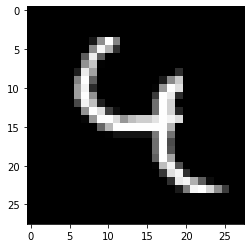

In [46]:
# your code here
x_cs109b = my_data.reshape(-1, 28, 28)
# Preview one image

image_id =10
plt.imshow(x_cs109b[image_id], cmap='gray')
plt.show()

**2.2** [15pts] Create a convolutional autoencoder called `cae`. This time you don't need separate references to the encoder and decoder parts since we only intend to use the full autoencoder. You may use a combination of `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `Reshape`, and `UpSampling2D` layers. You may use any number of these layers, and if you are unfamiliar with any of these layers we encourage you to look at their TF Keras documentation. You will have to experiment with an appropriate bottleneck size to complete the rest of question **2**. As always, print the `summary()` of your model.


In [47]:
# your code here
# Prepare the 4D inputs 
n_samples, h, w = x_cs109b.shape
x_cs109b_4D = x_cs109b.reshape(-1, h, w, 1)
x_cs109b_4D.shape

(3067, 28, 28, 1)

In [48]:
## First model built
# input layer
input_layer = Input(shape=(h, w, 1))
# encoding architecture
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same', use_bias=True)(input_layer)
encoded_layer1 = MaxPooling2D((2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2   = MaxPooling2D( (2, 2), padding='same', name='encoded_layer2')(encoded_layer2)
encoded_layer3 = Conv2D(4, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent_view   = MaxPooling2D( (2, 2), padding='same', name='latent_view')(encoded_layer3)
#bottle neck size is  4,4,4 

# decoding architecture
decoded_layer1 = Conv2D(4, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
CNNdecoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded_layer3)
#cnndecoded layer shape is 28,28,1

#model
cae = Model(input_layer, CNNdecoded, name='cae')
print(cae.summary())
cae.compile(optimizer='adadelta', loss='binary_crossentropy')

Model: "cae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
encoded_layer2 (MaxPooling2D (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 4)           1156      
_________________________________________________________________
latent_view (MaxPooling2D)   (None, 4, 4, 4)           0       

In [29]:
## Second model built

# input layer
input_layer = Input(shape=(h, w, 1))
# encoding architecture
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same', use_bias=True)(input_layer)
encoded_layer1 = MaxPooling2D((2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2   = MaxPooling2D( (2, 2), padding='same', name='encoded_layer2')(encoded_layer2)
encoded_layer3 = Conv2D(4, (3, 3), activation='relu', padding='same')(encoded_layer2)
encoded_layer3   = MaxPooling2D( (2, 2), padding='same', name='encoded_layer3')(encoded_layer3)
encoded_layer4 = Conv2D(4, (2, 2), activation='relu', padding='same')(encoded_layer3)
latent_view   = MaxPooling2D( (2, 2), padding='same', name='latent_view')(encoded_layer4)
#bottle neck size is  2,2,4 


# decoding architecture
decoded_layer0 = Conv2D(4, (2, 2), activation='relu', padding='same')(latent_view)
decoded_layer0 = UpSampling2D((2, 2))(decoded_layer0)
decoded_layer1 = Conv2D(4, (3, 3), activation='relu', padding='same')(decoded_layer0)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
CNNdecoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded_layer3)
#cnndecoded layer shape is 28,28,1

#model
cae2 = Model(input_layer, CNNdecoded, name='cae2')
print(cae2.summary())
cae2.compile(optimizer='adadelta', loss='binary_crossentropy')

Model: "cae2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
encoded_layer2 (MaxPooling2D (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 7, 7, 4)           1156      
_________________________________________________________________
encoded_layer3 (MaxPooling2D (None, 4, 4, 4)           0      

**2.3** [10pts] Train your convolutional autoencoder on `x_train` (from **problem 1**, MNIST), using `x_test` as validation data. Plot the train/validation loss versus epoch. This will adapt the convolutional autoencoder to the type of data we expect, handwritten digits.


In [51]:
x_train.shape

(60000, 28, 28)

In [ ]:
# your code here
%time

history1 = cae.fit(x_train.reshape(-1, h, w, 1), x_train.reshape(-1, h, w, 1),
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test.reshape(-1, h, w, 1), x_test.reshape(-1, h, w, 1)))


In [103]:
# your code here
%time

history = cae2.fit(x_train.reshape(-1, h, w, 1), x_train.reshape(-1, h, w, 1),
                epochs=500,
                batch_size=56,
                shuffle=True,
                validation_data=(x_test.reshape(-1, h, w, 1), x_test.reshape(-1, h, w, 1))
                   ,verbose=1)


CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 11.9 µs
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 14s 232us/sample - loss: 0.1863 - val_loss: 0.1851
Epoch 2/500
60000/60000 [==============================] - 14s 225us/sample - loss: 0.1862 - val_loss: 0.1851
Epoch 3/500
60000/60000 [==============================] - 14s 226us/sample - loss: 0.1862 - val_loss: 0.1850
Epoch 4/500
60000/60000 [==============================] - 14s 225us/sample - loss: 0.1861 - val_loss: 0.1850
Epoch 5/500
60000/60000 [==============================] - 14s 225us/sample - loss: 0.1861 - val_loss: 0.1849
Epoch 6/500
60000/60000 [==============================] - 14s 226us/sample - loss: 0.1860 - val_loss: 0.1849
Epoch 7/500
60000/60000 [==============================] - 14s 225us/sample - loss: 0.1860 - val_loss: 0.1849
Epoch 8/500
60000/60000 [==============================] - 14s 226us/sample - loss: 0.1859 - val_loss: 0.1848
Ep

Epoch 74/500
60000/60000 [==============================] - 14s 226us/sample - loss: 0.1832 - val_loss: 0.1821
Epoch 75/500
60000/60000 [==============================] - 14s 229us/sample - loss: 0.1832 - val_loss: 0.1821
Epoch 76/500
60000/60000 [==============================] - 14s 228us/sample - loss: 0.1831 - val_loss: 0.1820
Epoch 77/500
60000/60000 [==============================] - 14s 228us/sample - loss: 0.1831 - val_loss: 0.1820
Epoch 78/500
60000/60000 [==============================] - 14s 229us/sample - loss: 0.1831 - val_loss: 0.1820
Epoch 79/500
60000/60000 [==============================] - 14s 229us/sample - loss: 0.1830 - val_loss: 0.1819
Epoch 80/500
60000/60000 [==============================] - 14s 230us/sample - loss: 0.1830 - val_loss: 0.1819
Epoch 81/500
60000/60000 [==============================] - 14s 229us/sample - loss: 0.1830 - val_loss: 0.1818
Epoch 82/500
60000/60000 [==============================] - 14s 227us/sample - loss: 0.1829 - val_loss: 0.1818
E

60000/60000 [==============================] - 13s 221us/sample - loss: 0.1789 - val_loss: 0.1779
Epoch 221/500
60000/60000 [==============================] - 13s 222us/sample - loss: 0.1789 - val_loss: 0.1779
Epoch 222/500
60000/60000 [==============================] - 13s 222us/sample - loss: 0.1789 - val_loss: 0.1778
Epoch 223/500
60000/60000 [==============================] - 13s 222us/sample - loss: 0.1789 - val_loss: 0.1778
Epoch 224/500
60000/60000 [==============================] - 13s 222us/sample - loss: 0.1788 - val_loss: 0.1778
Epoch 225/500
60000/60000 [==============================] - 13s 221us/sample - loss: 0.1788 - val_loss: 0.1778
Epoch 226/500
60000/60000 [==============================] - 13s 225us/sample - loss: 0.1788 - val_loss: 0.1777
Epoch 227/500
60000/60000 [==============================] - 13s 222us/sample - loss: 0.1788 - val_loss: 0.1777
Epoch 228/500
60000/60000 [==============================] - 13s 221us/sample - loss: 0.1787 - val_loss: 0.1777
Epoch 

60000/60000 [==============================] - 13s 220us/sample - loss: 0.1757 - val_loss: 0.1747
Epoch 372/500
60000/60000 [==============================] - 13s 221us/sample - loss: 0.1757 - val_loss: 0.1747
Epoch 373/500
60000/60000 [==============================] - 13s 221us/sample - loss: 0.1757 - val_loss: 0.1747
Epoch 374/500
60000/60000 [==============================] - 13s 221us/sample - loss: 0.1757 - val_loss: 0.1747
Epoch 375/500
60000/60000 [==============================] - 13s 220us/sample - loss: 0.1756 - val_loss: 0.1746
Epoch 376/500
60000/60000 [==============================] - 13s 219us/sample - loss: 0.1756 - val_loss: 0.1746
Epoch 377/500
60000/60000 [==============================] - 13s 223us/sample - loss: 0.1756 - val_loss: 0.1746
Epoch 378/500
60000/60000 [==============================] - 13s 220us/sample - loss: 0.1756 - val_loss: 0.1746
Epoch 379/500
60000/60000 [==============================] - 13s 219us/sample - loss: 0.1756 - val_loss: 0.1746
Epoch 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



60000/60000 [==============================] - 13s 219us/sample - loss: 0.1753 - val_loss: 0.1743
Epoch 395/500
60000/60000 [==============================] - 13s 220us/sample - loss: 0.1753 - val_loss: 0.1743
Epoch 396/500
60000/60000 [==============================] - 13s 220us/sample - loss: 0.1752 - val_loss: 0.1742
Epoch 397/500
60000/60000 [==============================] - 13s 220us/sample - loss: 0.1752 - val_loss: 0.1742
Epoch 398/500
60000/60000 [==============================] - 13s 219us/sample - loss: 0.1752 - val_loss: 0.1742
Epoch 399/500
60000/60000 [==============================] - 13s 222us/sample - loss: 0.1752 - val_loss: 0.1742
Epoch 400/500
60000/60000 [==============================] - 13s 219us/sample - loss: 0.1752 - val_loss: 0.1742
Epoch 401/500
60000/60000 [==============================] - 13s 220us/sample - loss: 0.1751 - val_loss: 0.1741
Epoch 402/500
60000/60000 [==============================] - 13s 221us/sample - loss: 0.1751 - val_loss: 0.1741
Epoch 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



60000/60000 [==============================] - 13s 220us/sample - loss: 0.1736 - val_loss: 0.1726
Epoch 490/500
60000/60000 [==============================] - 13s 219us/sample - loss: 0.1736 - val_loss: 0.1726
Epoch 491/500
60000/60000 [==============================] - 13s 220us/sample - loss: 0.1736 - val_loss: 0.1726
Epoch 492/500
60000/60000 [==============================] - 13s 219us/sample - loss: 0.1736 - val_loss: 0.1725
Epoch 493/500
60000/60000 [==============================] - 13s 219us/sample - loss: 0.1735 - val_loss: 0.1725
Epoch 494/500
60000/60000 [==============================] - 13s 220us/sample - loss: 0.1735 - val_loss: 0.1725
Epoch 495/500
60000/60000 [==============================] - 13s 220us/sample - loss: 0.1735 - val_loss: 0.1725
Epoch 496/500
60000/60000 [==============================] - 13s 220us/sample - loss: 0.1735 - val_loss: 0.1725
Epoch 497/500
60000/60000 [==============================] - 13s 220us/sample - loss: 0.1735 - val_loss: 0.1725
Epoch 

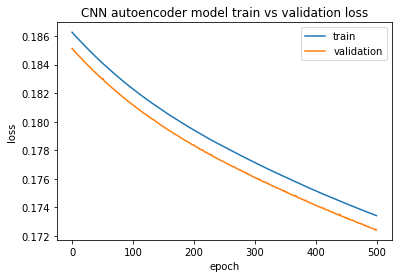

In [104]:

#plot our loss of cae
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN autoencoder model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


In [365]:
#save model
cae.save('CNNmodel.h5')
cae.save_weights('CNNmodel_weights.h5')

#reload model when wanted
cae =load_model('CNNmodel.h5')

In [ ]:
#save model CAE2 is better!!!
cae2.save('CNNmodel2.h5')

cae2.save_weights('CNNmodel2_weights.h5')

In [53]:

#reload model when wanted
cae2 =load_model('CNNmodel2.h5')

**2.4** [4pts] Pass `x_test` through your convolutional autoencoder (CAE), calling the resulting reconstruction of the dataset `cae_recons_x_test`. To see how well your CAE is performing, we will visually inspect some of its reconstructions. Make an array of subplots of 6 rows and 2 columns, with the rows being different elements of the test set (your choice) and the columns being the CAE reconstruction and the Original image. How good is the reconstruction? How does it compare to the reconstruction of your dense autoencoder from **1.13**?


In [54]:
cae_recons_x_test= cae2.predict(x_test.reshape(-1,h,w,1))
print("CNN autoencoder reconstrued image shape is", cae_recons_x_test.shape)

CNN autoencoder reconstrued image shape is (10000, 28, 28, 1)


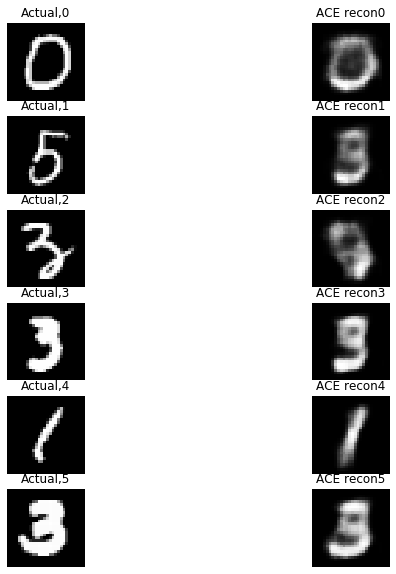

In [55]:
fig, ax = plt.subplots(6,2,figsize=(10,10))

for i, index in enumerate([ 10, 45, 87, 93,107,200]):
    ax[i,0].imshow(x_test[index].reshape(28,28), cmap='gray')
    ax[i,0].set_title(f'Actual,{i}') 
    ax[i,0].axis('off')
    
    ax[i,1].imshow(cae_recons_x_test[index].reshape(28,28), cmap='gray')
    ax[i,1].set_title(f'ACE recon{i}') 
    ax[i,1].axis('off')


*Your answer here*

**2.5** [4pts] Construct an instance of `tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)` and use it to calculate the MSE reconstruction error of every element in `x_test`. Save this array as `mse_x_test`; you want this output to be a 1D array so consider the required shapes of what you feed in to the `MeanSquaredError` object. We will now pass the mystery dataset through the CAE: reconstruct `x_cs109b`, saving the result as `cae_recons_x_cs109b`. Compute the reconstruction errors, saving the result as `mse_x_cs109b`.


In [56]:
# your code here
mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)

In [57]:
# calculate the MSE reconstruction error of every element in x test
mse_x_test = mse(cae_recons_x_test.reshape(-1, 28*28), x_test.reshape(-1,28*28))

In [59]:
#pass the new dataset
cae_recons_x_cs109b = cae2.predict(x_cs109b.reshape(-1,h,w,1)).reshape(-1, 28*28)
mse_x_cs109b = mse(cae_recons_x_cs109b, x_cs109b.reshape(-1, 28*28))


**2.6** [5pts] Using subplots, plot the histograms of `mse_x_test` and `mse_x_cs109b` side-by-side. For the most part, do they look like they are coming from similar types of data? Pick a reasonable threshold value for reconstruction error based on the histogram for `mse_x_cs109b`; plot this threshold as a vertical line on the histogram. Be sure to explain your choice of threshold. Beyond this threshold, you will examine the images to see if you can find letters. Print how many images lie beyond this threshold.


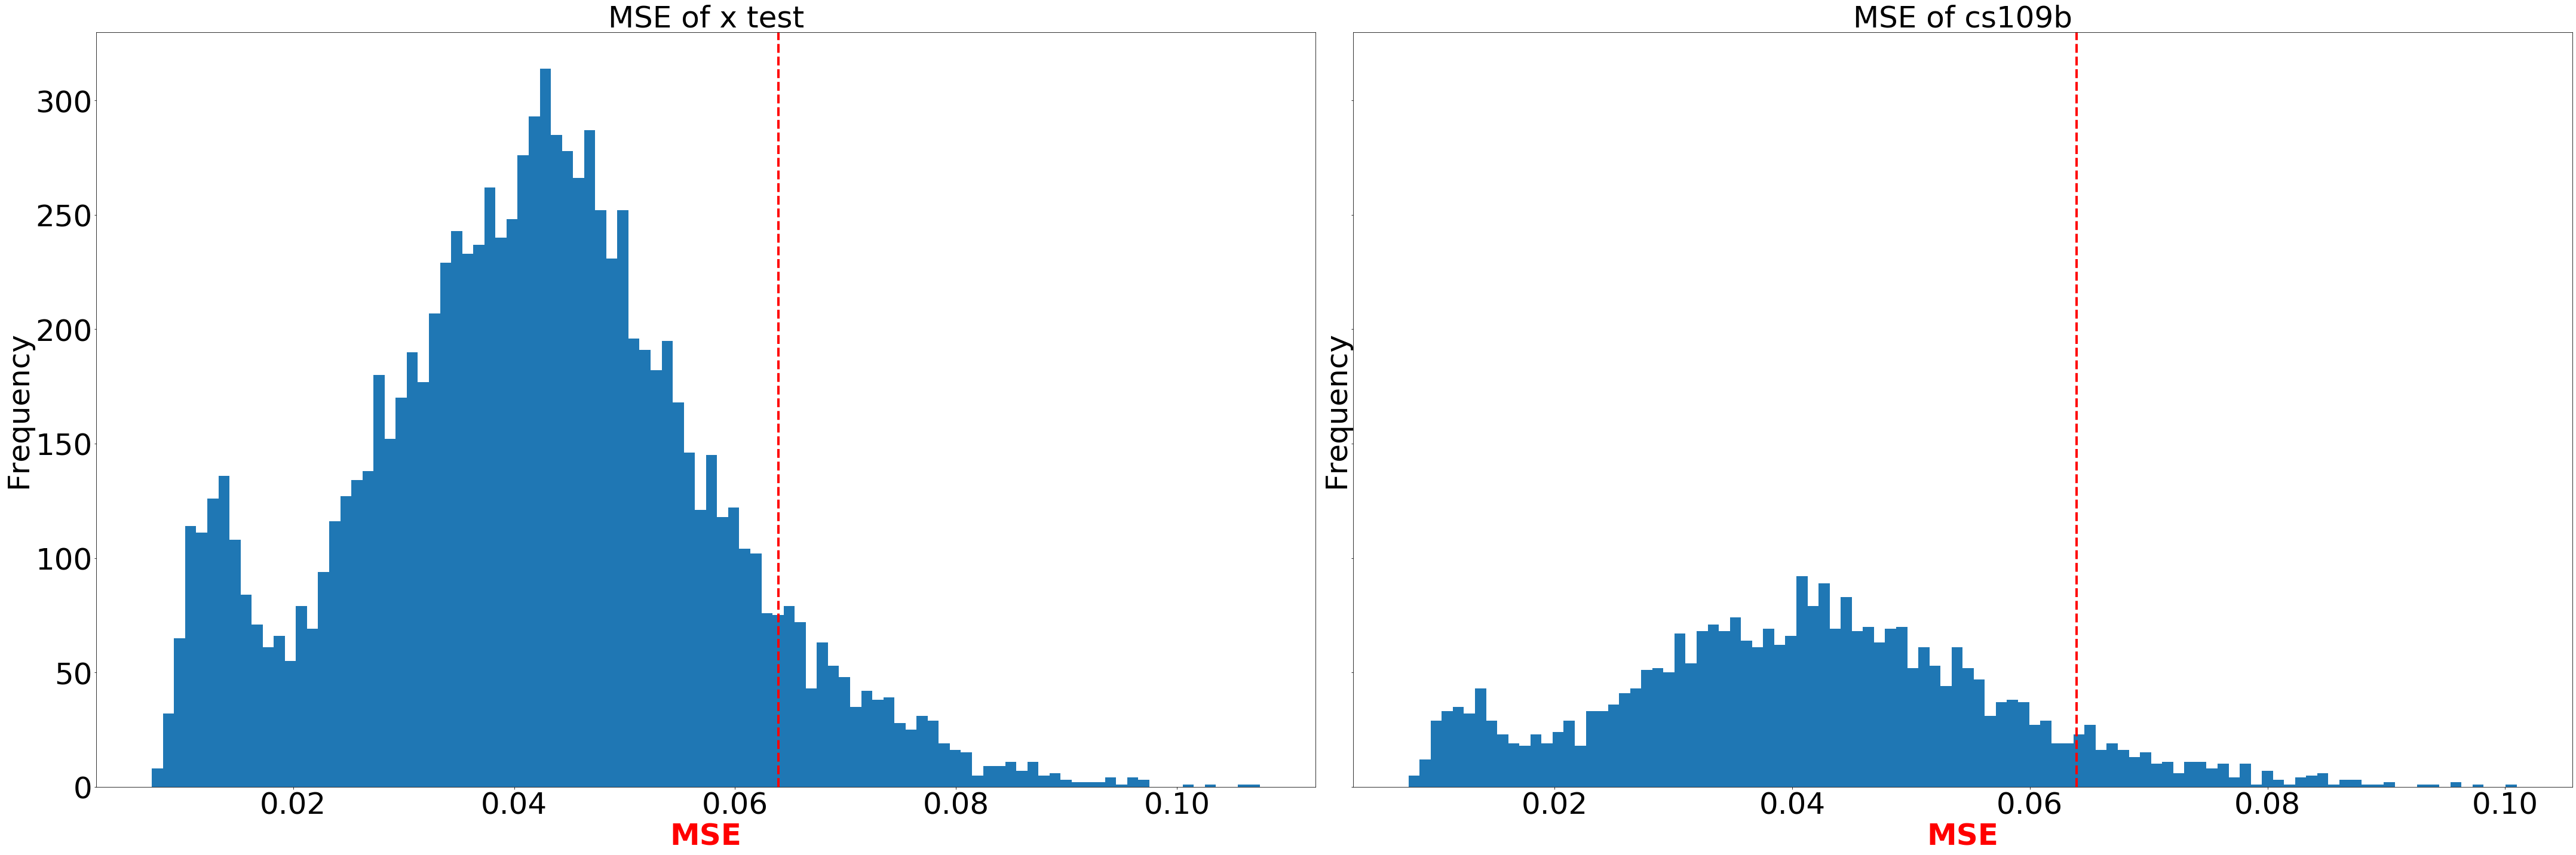

In [60]:
# your code here
f, ax = plt.subplots(1,2, figsize=(60,20), sharey=True, tight_layout=True )

ax[0].hist(x=mse_x_test,bins=100)
ax[0].set_title("MSE of x test", size = 50);
ax[0].set_ylabel("Frequency",fontsize=50);
ax[0].tick_params(labelsize=50)
# Custom Axis title
ax[0].set_xlabel('MSE', fontweight='bold', color = 'red', fontsize='50', horizontalalignment='center')

thresh = 0.06393682420253755
ax[0].axvline(x=thresh, color='r', linestyle='dashed', linewidth=4)

ax[1].hist(x=mse_x_cs109b, bins=100)
ax[1].set_title('MSE of cs109b', size = 50)
ax[1].set_ylabel("Frequency", size =50)
ax[1].tick_params(labelsize=50)
ax[1].set_xlabel('MSE', fontweight='bold', color = 'red', fontsize='50', horizontalalignment='center')
ax[1].axvline(x=thresh, color='r', linestyle='dashed', linewidth=4)
plt.show()

In [61]:
#exame some ways to pick the threshold: mean and std
test_error=mse_x_test.numpy()
cs109b_error= mse_x_cs109b.numpy()
mean= cs109b_error.mean()
std = cs109b_error.std()
thresh0 = mean+ 1* std
idxs0 = np.where(np.array(cs109b_error) >= thresh0)[0]
print(mean+ 1* std)
print(" {} outliers found".format(len(idxs0)))

0.05711342355821514
 464 outliers found


In [62]:
#exame some ways to pick the threshold: pecentile
print("92th percentile of test_error : ", 
       np.percentile(test_error, 92)) 
print("92th percentile of cs109b_error : ", 
       np.percentile(cs109b_error, 92)) 

92th percentile of test_error :  0.06392135918140411
92th percentile of cs109b_error :  0.06393682420253755


In [63]:
thresh = np.percentile(test_error,92)
idxs = np.where(np.array(cs109b_error) >= thresh)[0]
print(" mse threshold: {}".format(thresh))
print(" {} outliers found".format(len(idxs)))

 mse threshold: 0.06392135918140411
 248 outliers found


*Threshold*

I would like to pick the threshold as the 92th percentile of the cs109b data's MSE -- 0.0639.
I have tried couple methods to decide on the thresold: 
1. Mean+SD:
This criteria is too loose, which means I need to manually check too many images (464 images). Even thought this may introduce 1 or 2 more letters, but the efforts does not worth the incremental benefit in my mind.
2. 95 pecentile: 
This criteia is a little bit too tight, and does not help to identify enough lettes. 
3. 92 percentile:
This is a good balance between the cost and benefit. 

**2.7** [10pts] Use the subset of data determined by your threshold to find the letters in `x_cs109b`, displaying them as images. Show your work! Create a 2-column table indicating the letter (e.g., 'a') and the index where it is located (e.g. '9728'). There are a few letters total. To get full credit you need to find most of them (you should not need to examine more than a few tens of images - if so, consider a different threshold in **2.6** or check your CAE performance).

You will have been able to find the majority of the letters hidden in the dataset of thousands of images, while only having to manually look at 1/100th of the dataset. This demonstrates how autoencoders could be used as a cheap preprocessing step to draw out the most "interesting" data.

In [64]:
idxs
print("The threshold selected will lable outlier image amount of", len(idxs))


The threshold selected will lable outlier image amount of 248


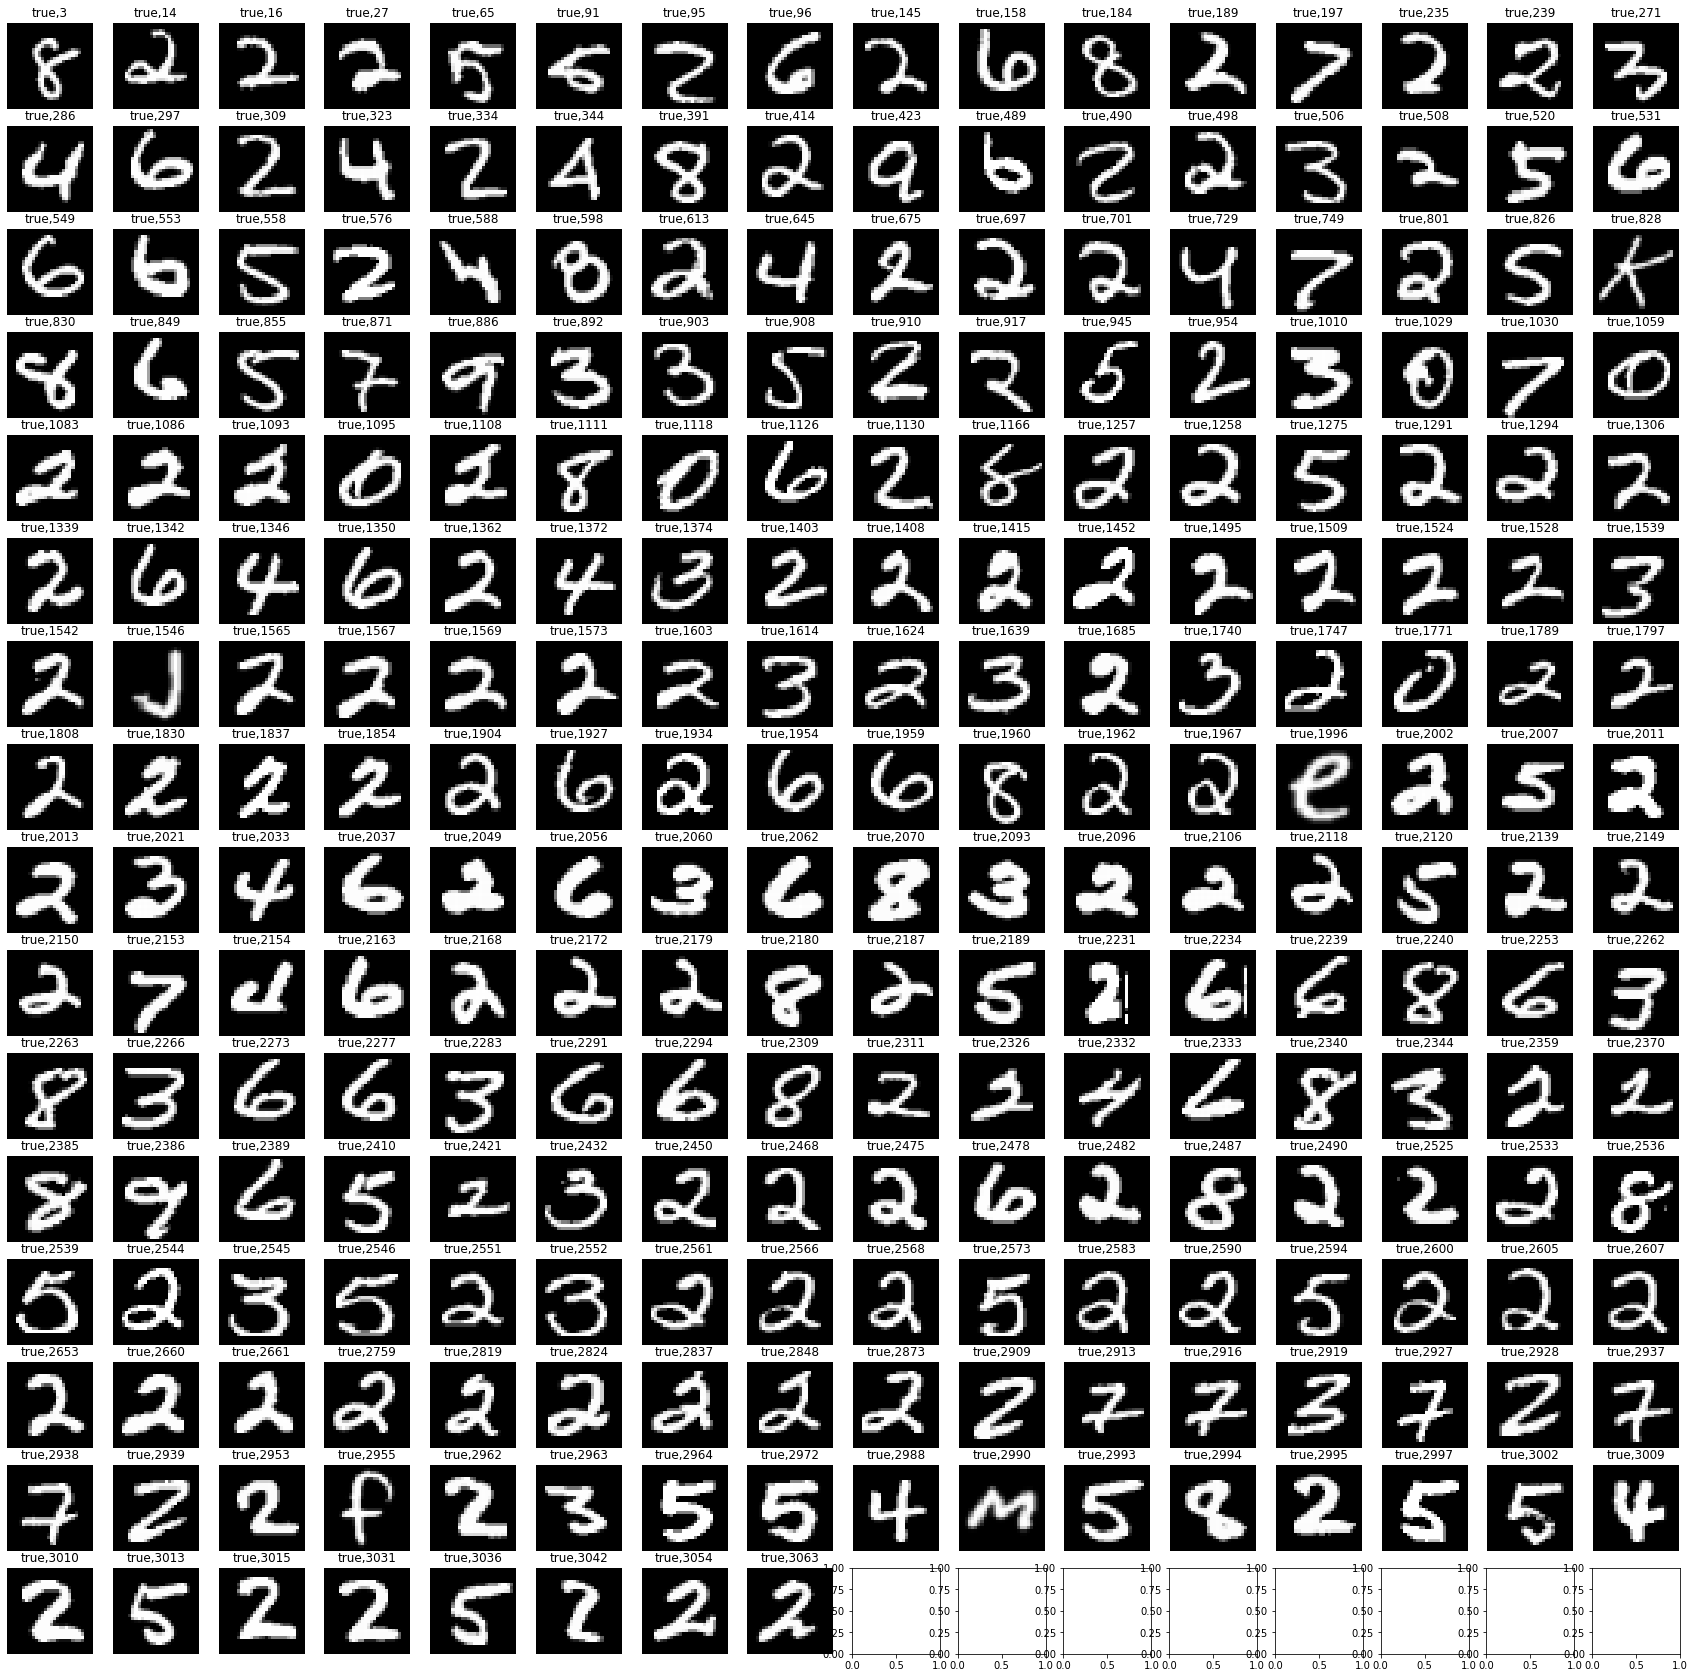

In [65]:
### Visulize the original image and find the letters!!

import math
rows = math.ceil(math.sqrt(len(idxs)))
fig, ax = plt.subplots(rows, rows,figsize=(30,30))

for i, index in enumerate(idxs):
    x_ax, y_ax = i // rows, i % rows
    ax[x_ax, y_ax].imshow(x_cs109b[index], cmap='gray')
    ax[x_ax, y_ax].set_title(f'true,{index}') 
    ax[x_ax, y_ax].axis('off')
    
plt.show()


In [66]:
##This the final table with letters and index

import pandas as pd
letters= ['k','j','m','f','e']
indices = [828,1546,2990,2955,1996]

final=pd.DataFrame({"letter": letters, "index": indices})
print(final)


  letter  index
0      k    828
1      j   1546
2      m   2990
3      f   2955
4      e   1996


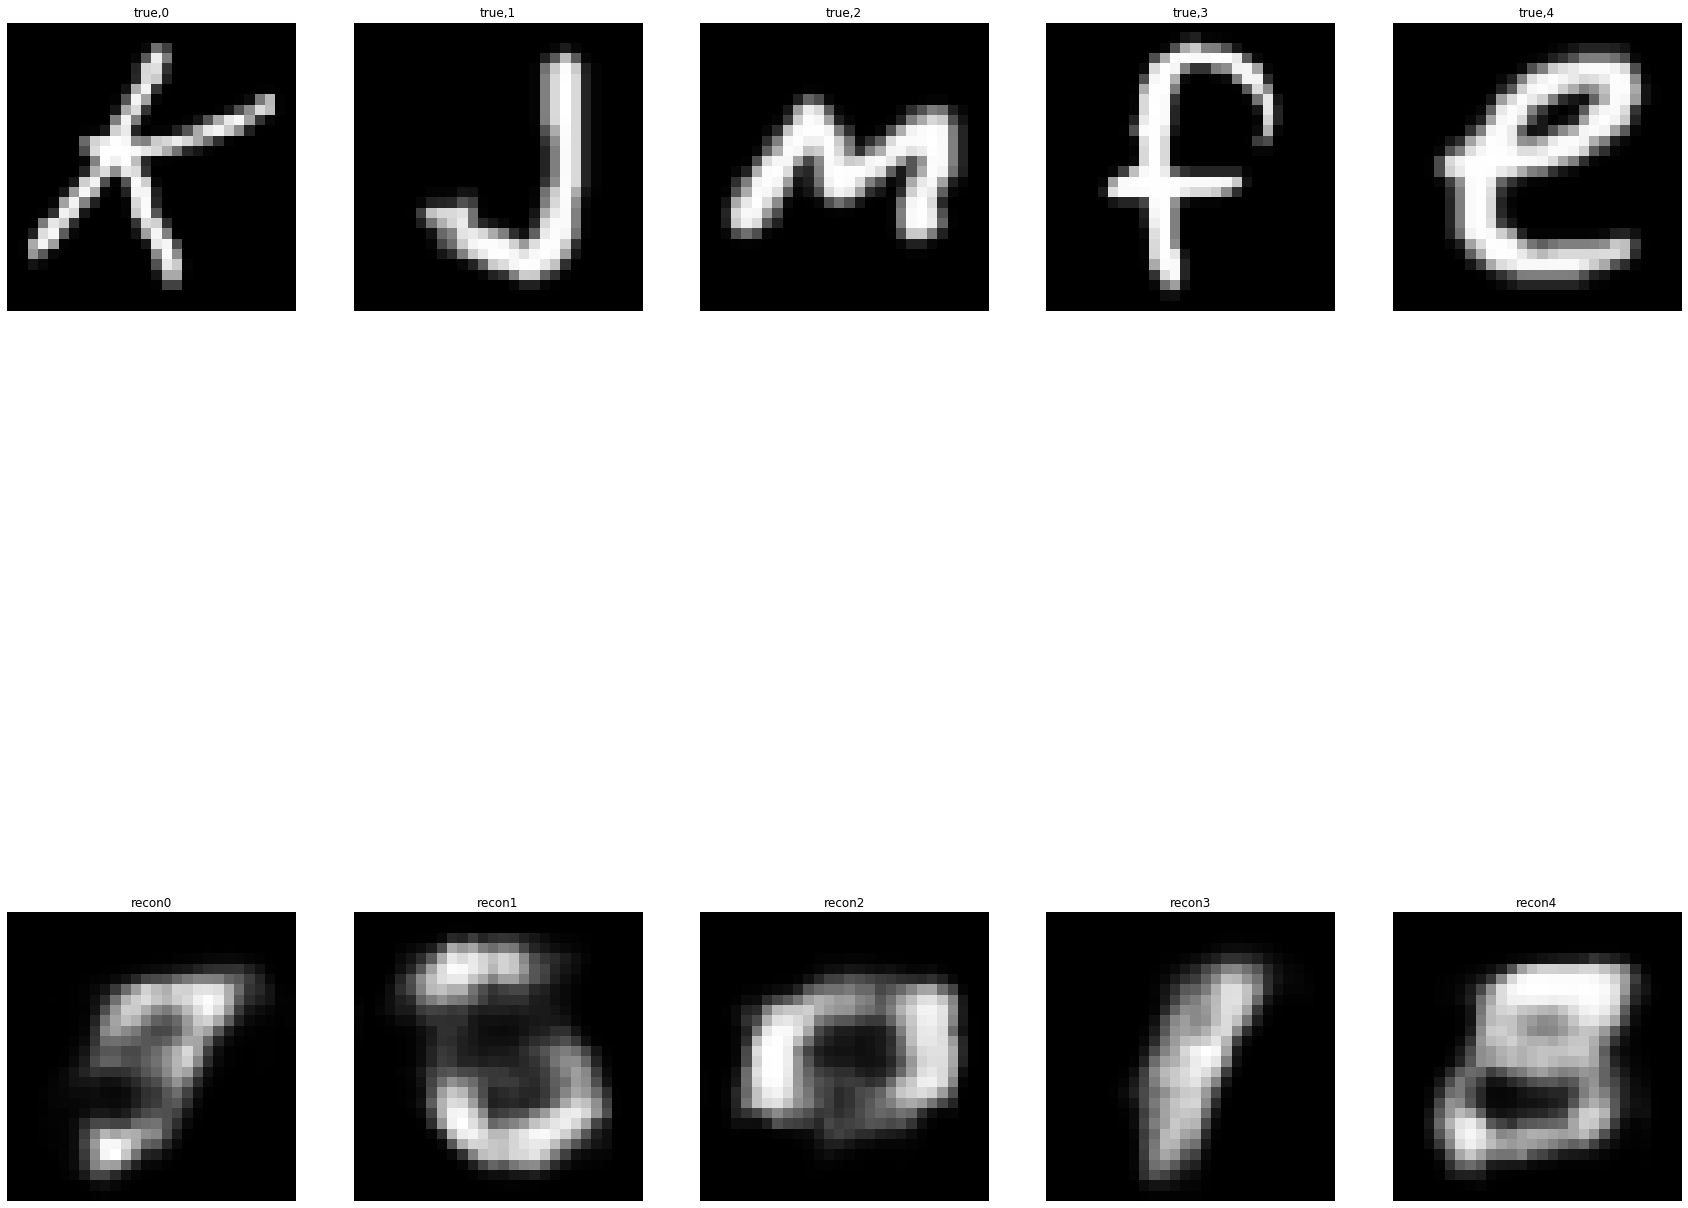

In [67]:
### Visulize these letters of  original image and the reconstructed images
fig, ax = plt.subplots(2,5, figsize=(30,30))

for i, index in enumerate([828,1546,2990,2955,1996]):
    
    ax[0,i].imshow(x_cs109b[index], cmap='gray')
    ax[0,i].set_title(f'true,{i}') 
    ax[0,i].axis('off')
    
    ax[1,i].imshow(cae_recons_x_cs109b[index].reshape(28,28),cmap='gray' )
    ax[1,i].set_title(f'recon{i}') 
    ax[1,i].axis('off')
    
plt.show()


*Your answer here*